### 1. 调用KNN函数来实现分类
数据采用的是经典的iris数据，是三分类问题

In [1]:
# 读取相应的库
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

In [2]:
# 读取数据 X, y
iris = datasets.load_iris()
print("iris dataset type:", type(iris))
X = iris.data
y = iris.target
print("iris feature type:", type(X))

iris dataset type: <class 'sklearn.utils.Bunch'>
iris feature type: <class 'numpy.ndarray'>


In [3]:
print (X[:5], y[:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]] [0 0 0 0 0]


In [4]:
# 把数据分成训练数据和测试数据
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2003)

In [5]:
# 构建KNN模型， K值为3、 并做训练
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [7]:
# 计算准确率
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test)
correct = np.count_nonzero((y_pred==y_test)==True)
#accuracy_score(y_test, clf.predict(X_test))
print ("Accuracy is: %.3f" %(correct/len(X_test)))

Accuracy is: 0.921


In [9]:
acc = accuracy_score(y_test, y_pred)
print ("Accuracy is: %.3f" % acc )

Accuracy is: 0.921


### 2. 从零开始自己写一个KNN算法

In [10]:
from sklearn import datasets
from collections import Counter  # 为了做投票
from sklearn.model_selection import train_test_split
import numpy as np

# 导入iris数据
iris = datasets.load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2003)

In [11]:
def euc_dis(instance1, instance2):
    """
    计算两个样本instance1和instance2之间的欧式距离
    instance1: 第一个样本， array型
    instance2: 第二个样本， array型
    """
    # TODO
    dist = np.sqrt(sum((instance1 - instance2)**2))
    return dist
    
 
def knn_classify(X, y, testInstance, k):
    """
    给定一个测试数据testInstance, 通过KNN算法来预测它的标签。 
    X: 训练数据的特征
    y: 训练数据的标签
    testInstance: 测试数据，这里假定一个测试数据 array型
    k: 选择多少个neighbors? 
    """
    # TODO  返回testInstance的预测标签 = {0,1,2}
    distances = [euc_dis(x, testInstance) for x in X]
    kneighbors = np.argsort(distances)[:k]
    count = Counter(y[kneighbors])
    print(count)
    return count.most_common()[0][0]

In [12]:
# 预测结果。    
predictions = [knn_classify(X_train, y_train, data, 3) for data in X_test]
correct = np.count_nonzero((predictions==y_test)==True)
#accuracy_score(y_test, clf.predict(X_test))
print ("Accuracy is: %.3f" %(correct/len(X_test)))

Counter({1: 3})
Counter({0: 3})
Counter({1: 3})
Counter({2: 3})
Counter({1: 3})
Counter({1: 2, 2: 1})
Counter({1: 3})
Counter({1: 3})
Counter({1: 3})
Counter({1: 3})
Counter({0: 3})
Counter({0: 3})
Counter({0: 3})
Counter({1: 3})
Counter({2: 3})
Counter({0: 3})
Counter({2: 2, 1: 1})
Counter({2: 3})
Counter({2: 3})
Counter({0: 3})
Counter({1: 3})
Counter({2: 3})
Counter({1: 3})
Counter({1: 3})
Counter({0: 3})
Counter({1: 3})
Counter({2: 2, 1: 1})
Counter({2: 3})
Counter({1: 3})
Counter({2: 3})
Counter({0: 3})
Counter({0: 3})
Counter({1: 3})
Counter({1: 3})
Counter({0: 3})
Counter({1: 3})
Counter({2: 3})
Counter({0: 3})
Accuracy is: 0.921


### 3. KNN的决策边界

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from itertools import product
from sklearn.neighbors import KNeighborsClassifier

# 生成一些随机样本
n_points = 100
# np.random.multivariate_normal 参考：https://blog.csdn.net/zch1990s/article/details/80005940
X1 = np.random.multivariate_normal([1,50], [[1,0],[0,10]], n_points)
X2 = np.random.multivariate_normal([2,50], [[1,0],[0,10]], n_points)
print("X1 shape:",X1.shape)
print("X2 shape:",X2.shape)
X = np.concatenate([X1,X2])
y = np.array([0]*n_points + [1]*n_points)
print (X.shape, y.shape)

X1 shape: (100, 2)
X2 shape: (100, 2)
(200, 2) (200,)


In [14]:
# KNN模型的训练过程
clfs = []
neighbors = [1,3,5,9,11,13,15,17,19]
for i in range(len(neighbors)):
    clfs.append(KNeighborsClassifier(n_neighbors=neighbors[i]).fit(X,y))

In [17]:
# 可视化结果
# meshgrid 参考：https://blog.csdn.net/lllxxq141592654/article/details/81532855
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
print("x_min, x_max", x_min, x_max)
print("y_min, y_max", y_min, y_max)
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1),)
print(type(xx))
print(xx.shape, xx[:5])

x_min, x_max -2.0753890123690275 5.524973931241159
y_min, y_max 38.3575657832552 58.74528706121462
<class 'numpy.ndarray'>
(204, 77) [[-2.07538901 -1.97538901 -1.87538901 -1.77538901 -1.67538901 -1.57538901
  -1.47538901 -1.37538901 -1.27538901 -1.17538901 -1.07538901 -0.97538901
  -0.87538901 -0.77538901 -0.67538901 -0.57538901 -0.47538901 -0.37538901
  -0.27538901 -0.17538901 -0.07538901  0.02461099  0.12461099  0.22461099
   0.32461099  0.42461099  0.52461099  0.62461099  0.72461099  0.82461099
   0.92461099  1.02461099  1.12461099  1.22461099  1.32461099  1.42461099
   1.52461099  1.62461099  1.72461099  1.82461099  1.92461099  2.02461099
   2.12461099  2.22461099  2.32461099  2.42461099  2.52461099  2.62461099
   2.72461099  2.82461099  2.92461099  3.02461099  3.12461099  3.22461099
   3.32461099  3.42461099  3.52461099  3.62461099  3.72461099  3.82461099
   3.92461099  4.02461099  4.12461099  4.22461099  4.32461099  4.42461099
   4.52461099  4.62461099  4.72461099  4.82461099  4.

xx.shape (204, 77)
xx_ravel.shape (15708,)
xx_test.shape (15708, 2)
xx.shape (204, 77)
xx_ravel.shape (15708,)
xx_test.shape (15708, 2)
xx.shape (204, 77)
xx_ravel.shape (15708,)
xx_test.shape (15708, 2)
xx.shape (204, 77)
xx_ravel.shape (15708,)
xx_test.shape (15708, 2)
xx.shape (204, 77)
xx_ravel.shape (15708,)
xx_test.shape (15708, 2)
xx.shape (204, 77)
xx_ravel.shape (15708,)
xx_test.shape (15708, 2)
xx.shape (204, 77)
xx_ravel.shape (15708,)
xx_test.shape (15708, 2)
xx.shape (204, 77)
xx_ravel.shape (15708,)
xx_test.shape (15708, 2)
xx.shape (204, 77)
xx_ravel.shape (15708,)
xx_test.shape (15708, 2)


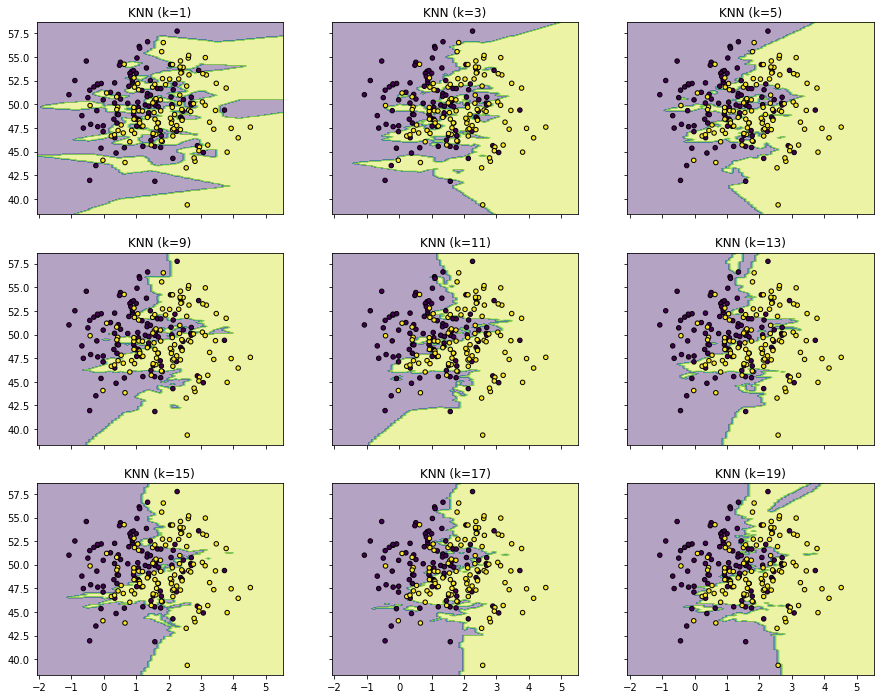

In [18]:
# itertools.product 笛卡尔积参考：https://blog.csdn.net/qq_33528613/article/details/79365291

f, axarr = plt.subplots(3,3, sharex='col', sharey='row', figsize=(15, 12))
for idx, clf, tt in zip(product([0, 1, 2], [0, 1, 2]),
                        clfs,
                        ['KNN (k=%d)'%k for k in neighbors]):
    
    # numpy.ndarray.ravel  参考： https://blog.csdn.net/liuweiyuxiang/article/details/78220080
    # 将多维数组降位一维， 会影响（reflects）原始矩阵
    # numpy.c_ 参考：https://blog.csdn.net/yj1556492839/article/details/79031693
    # np.c_是按行连接两个矩阵，就是把两矩阵左右相加，要求行数相等，类似于pandas中的merge()
    xx_ravel = xx.ravel()
    yy_ravel = yy.ravel()
    print("xx.shape", xx.shape)
    print("xx_ravel.shape", xx_ravel.shape)
    # 在numpy中，一个列表虽然是横着表示的，但它是列向量。
    xx_test = np.c_[xx_ravel, yy_ravel]
    print("xx_test.shape", xx_test.shape)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y,
                                  s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)
    
plt.show()